In [1]:
--Sorok száma a táblában----
SELECT Count(*) AS 'Sorok száma'
FROM Termek

--Árak elemzése--
SELECT MIN(LISTAAR) AS 'Minimum Ár',
        MAX(LISTAAR) AS 'Maximum Ár',
        ROUND(AVG(LISTAAR),0) AS 'Átlag Ár',
        ROUND(STDEV(LISTAAR),0) AS 'Szórás'
FROM Termek

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.142

Sorok száma
551


Minimum Ár,Maximum Ár,Átlag Ár,Szórás
0,46000,786,3602


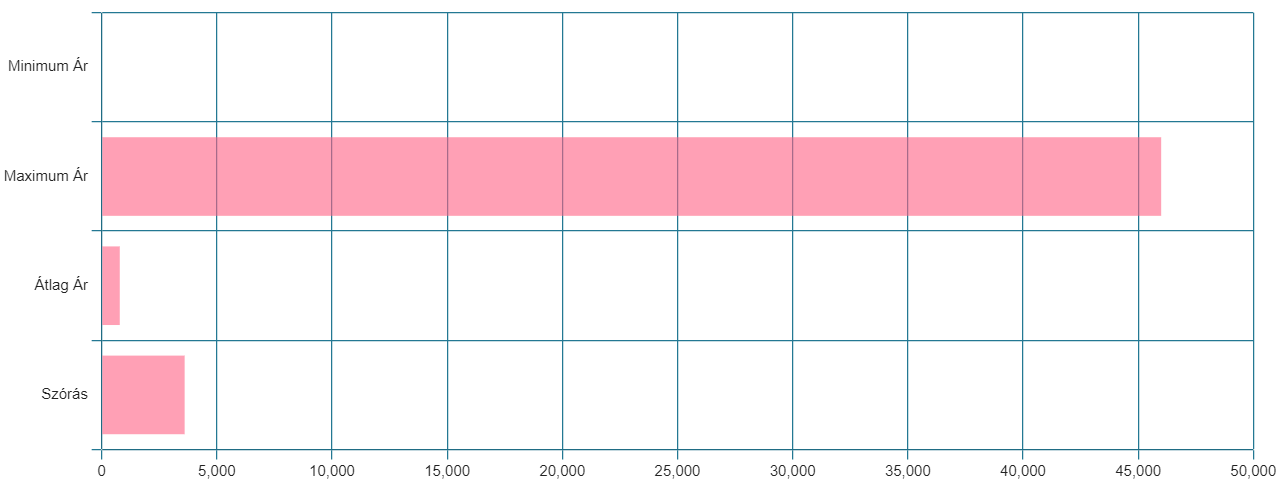

In [2]:
--5 legnagyobb érték a LISTAAR táblában--
SELECT TOP 5 LISTAAR AS 'Legnagyobb értékek'
FROM TERMEK
ORDER BY LISTAAR DESC

--10 Random érték a LISTAAR táblában--
SELECT TOP 10 LISTAAR AS 'Árak'
FROM TERMEK
GROUP BY LISTAAR
ORDER BY NEWID()

(5 rows affected)

(10 rows affected)

Total execution time: 00:00:00.022

Legnagyobb értékek
46000
39000
32000
24000
22000


Árak
990
73
30
80
293
24000
16900
165
210
11900


In [4]:
--Rögzitő csoportosítása szerinti eloszlás--
SELECT FELVITTE AS 'Adatrögzítő neve',COUNT(*) AS 'Felvitt adat mennyisége'
FROM Termek
GROUP BY FELVITTE
ORDER BY count(*) DESC

--FELVITTE tábla egyedi értékei--
SELECT COUNT(DISTINCT FELVITTE) AS 'Egyedi érték'
FROM TERMEK
WHERE FELVITTE IS NOT NULL

(3 rows affected)

(1 row affected)

Total execution time: 00:00:00.024

Adatrögzítő neve,Felvitt adat mennyisége
Béla,189
Sára,188
Mari,174


Egyedi érték
3


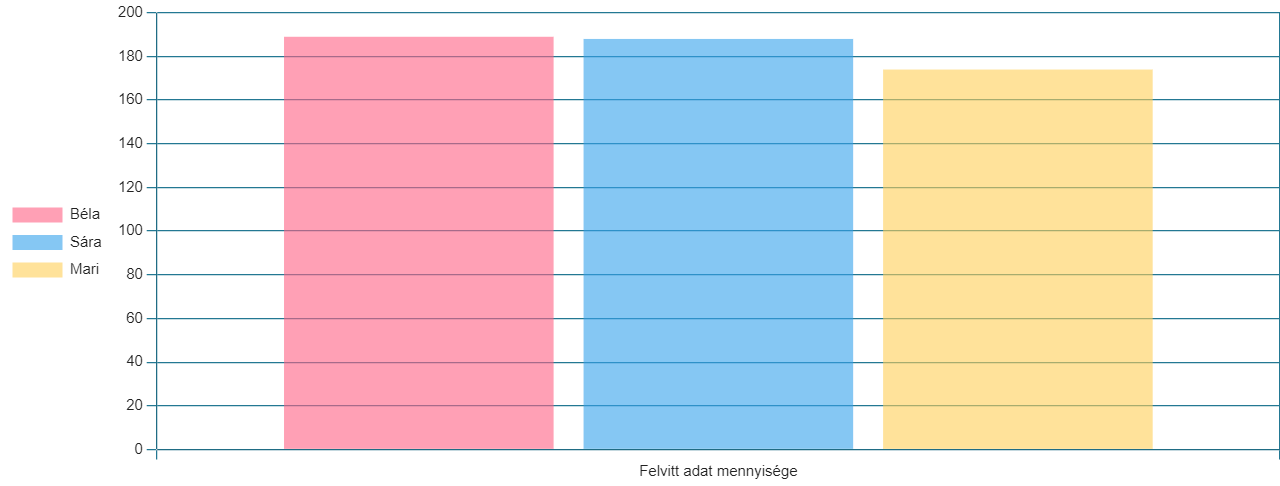

In [5]:
--Üres értékek a Leírás táblában--
SELECT IIF(LEIRAS IS NULL,'Leírás nélküli','Leírásos') AS 'Kategória', 
        Count(*) AS 'Darabszám'
FROM TERMEK
GROUP BY IIF(LEIRAS IS NULL,'Leírás nélküli','Leírásos')

(2 rows affected)

Total execution time: 00:00:00.020

Kategória,Darabszám
Leírás nélküli,527
Leírásos,24


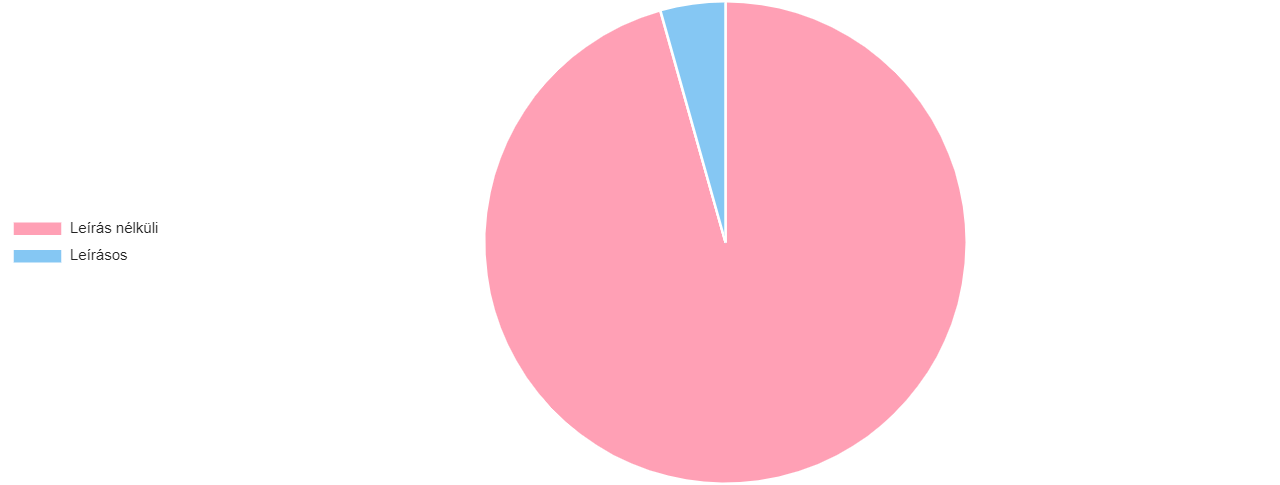

In [2]:
--Készletmennyiség elemzése--
DECLARE 
@min int = 300, --Minimum készlet mennyiség--
@max int = 8000; --Maximum készlet mennyiség--

SELECT SUM(CASE WHEN KESZLET < @min THEN 1 ELSE 0 end) AS 'Minimum alatt',
    SUM(CASE WHEN KESZLET BETWEEN @min and @max THEN 1 ELSE 0 end) AS 'Megfelelő',
    SUM(CASE WHEN KESZLET > @max THEN 1 ELSE 0 end) AS 'Maximum felett'
FROM Termek

--Variancia a KESZLET táblában--
SELECT VAR(KESZLET) AS 'Variancia'
FROM Termek



(1 row affected)

(1 row affected)

Total execution time: 00:00:00.276

Minimum alatt,Megfelelő,Maximum felett
210,324,17


Variancia
"21200385,34719023"


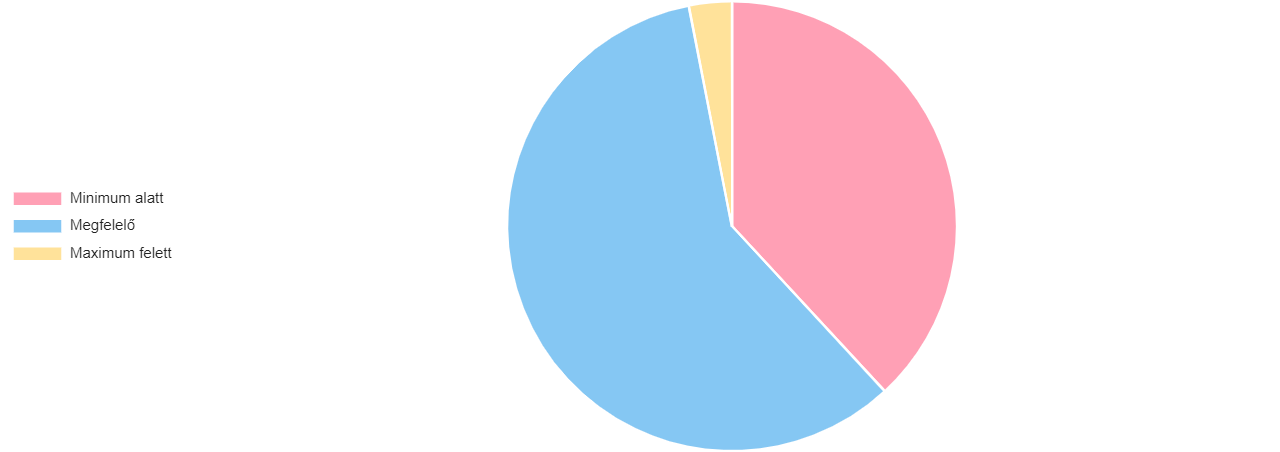

In [4]:
--TOP 10 leghosszabb szöveg a MEGNEVEZES táblában--

SELECT TOP 10 MEGNEVEZES AS 'Megnevezés', 
        LEN(MEGNEVEZES) AS 'Szöveg hossza'
FROM TERMEK
GROUP BY MEGNEVEZES
ORDER BY LEN(MEGNEVEZES) DESC

--Egyedi értékek a MEGNEVEZES táblában--
SELECT COUNT(DISTINCT MEGNEVEZES) AS 'Egyedi érték'
FROM TERMEK
WHERE MEGNEVEZES IS NOT NULL

--Sorok hosszának eloszlása--
SELECT len(MEGNEVEZES) AS 'Sorok hossza',count(*) as 'Sorok száma'
FROM Termek
GROUP BY len(MEGNEVEZES)
ORDER BY 1


(10 rows affected)

(1 row affected)

(33 rows affected)

Total execution time: 00:00:00.130

Megnevezés,Szöveg hossza
A föld amelyen élünk - Távoli földrészek,40
Összefoglaló feladatgyüjtemény számtech.,40
A föld amelyen élünk - Hazánk földrajza,39
A föld amelyen élünk - Európa földrajza,39
G. toll betét UNI lachnok Fine SA-7C,36
Ragasztószalag 19 mm-es SCOTCH+ tépő,36
A föld amelyen élünk - munkafüzet,33
Díszdoboz tollnak 2 db-os keskeny,33
Golyóstoll + ceruza Twister 2in1,32
"Ajándék cs. tasak italos, fólia",31


Egyedi érték
543


Sorok hossza,Sorok száma
3,2
5,2
6,1
7,2
8,5
9,8
10,15
11,18
12,23
13,30
